In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import xam
import seaborn as sns 
import matplotlib.pyplot as plt


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
train_data= pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission2.csv')

###### !pip install git+https://github.com/MaxHalford/xam --upgrade

In [3]:
# drop ID column
train_data.drop('EmployeeNo', axis=1, inplace=True)

test_id = test_data['EmployeeNo']
test_data.drop('EmployeeNo', axis=1, inplace=True)

In [4]:
cat_cols = list(train_data.select_dtypes(include='object').columns)
num_cols = list(train_data.select_dtypes(exclude='object').columns)

In [5]:
train_data.isna().sum()

Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [6]:
train_data['Qualification'].value_counts()

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

In [7]:
# filling the missing_Qualification with the highest occurred data(First Degree or HND)
# train_data['Missing_quaifications'] =  train_data['Qualification'].isna().astype('int64')
train_data['Qualification'].fillna('First Degree or HND', inplace=True)

# test_data['Missing_quaifications'] =  test_data['Qualification'].isna().astype('int64')
test_data['Qualification'].fillna('First Degree or HND', inplace=True)

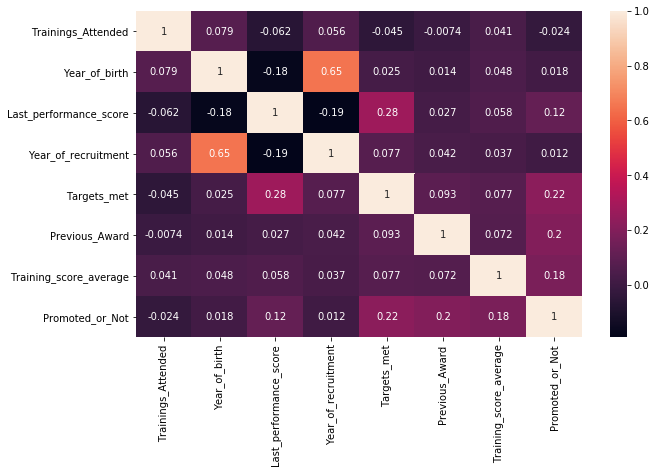

In [8]:
corr = train_data.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True)

Text(0.5, 1.0, 'Age of Staff vs Year or recruitment')

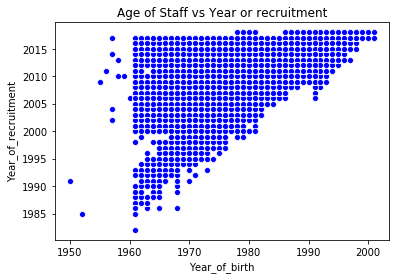

In [9]:
sns.scatterplot(x = 'Year_of_birth', y = 'Year_of_recruitment' , data = train_data ,  color = 'blue')
plt.title('Age of Staff vs Year or recruitment')

In [10]:
train_data[cat_cols].head()

,Division,Qualification,Gender,Channel_of_Recruitment,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,ANAMBRA,No,Married,No,No,0
1,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,ANAMBRA,Yes,Married,No,No,0
2,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,KATSINA,Yes,Married,No,No,0
3,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,NIGER,Yes,Single,No,No,1
4,Information and Strategy,First Degree or HND,Male,Direct Internal process,AKWA IBOM,Yes,Married,No,No,1


In [11]:
for col in cat_cols:
    print("{}: {}".format(col, train_data[col].nunique()))

Division: 9
Qualification: 3
Gender: 2
Channel_of_Recruitment: 3
State_Of_Origin: 37
Foreign_schooled: 2
Marital_Status: 3
Past_Disciplinary_Action: 2
Previous_IntraDepartmental_Movement: 2
No_of_previous_employers: 7


In [ ]:
train_data['Year_of_birth'] = 2019 - train_data['Year_of_birth']
train_data['Year_of_recruitment'] = 2019 - train_data['Year_of_recruitment']

test_data['Year_of_birth'] = 2019 - test_data['Year_of_birth']
test_data['Year_of_recruitment'] = 2019 - test_data['Year_of_recruitment']

In [13]:
# mean encoding

mean_enc = xam.feature_extraction.BayesianTargetEncoder(columns=cat_cols)

y = train_data['Promoted_or_Not']
train_enc = train_data.drop('Promoted_or_Not', axis=1)
mean_enc.fit(train_enc, y)

train_enc = mean_enc.transform(train_enc)
test_enc = mean_enc.transform(test_data)

In [14]:
train_enc.drop(cat_cols, axis=1, inplace=True)
test_enc.drop(cat_cols, axis=1, inplace=True)

In [15]:
train_enc.head()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Division_mean,Qualification_mean,Gender_mean,Channel_of_Recruitment_mean,State_Of_Origin_mean,Foreign_schooled_mean,Marital_Status_mean,Past_Disciplinary_Action_mean,Previous_IntraDepartmental_Movement_mean,No_of_previous_employers_mean
0,2,1986,12.5,2011,1,0,41,0.072019,0.096552,0.089010,0.083188,0.095281,0.081785,0.084971,0.084511,0.085336,0.082371
1,2,1991,12.5,2015,0,0,52,0.088252,0.079887,0.082708,0.084281,0.095281,0.084868,0.084971,0.084511,0.085336,0.082371
2,2,1987,7.5,2012,0,0,42,0.072019,0.079887,0.082708,0.083188,0.078964,0.084868,0.084971,0.084511,0.085336,0.082371
3,3,1982,2.5,2009,0,0,42,0.072019,0.079887,0.082708,0.084281,0.072580,0.084868,0.081750,0.084511,0.085336,0.085541
4,3,1990,7.5,2012,0,0,77,0.093290,0.079887,0.082708,0.083188,0.084682,0.084868,0.084971,0.084511,0.085336,0.085541


In [16]:
from sklearn.cluster import KMeans

In [17]:
cat_col_train = train_enc[['Targets_met','Last_performance_score']]
cat_col_test = test_enc[['Targets_met','Last_performance_score']]

In [18]:
### CLUSTERING
k_train = KMeans(n_clusters=3)
k_train.fit(cat_col_train)
train_enc['Cluster'] = k_train.predict(cat_col_train)

k_test = KMeans(n_clusters=3)
k_test.fit(cat_col_test)
test_enc['Cluster'] = k_test.predict(cat_col_test)

In [20]:
### spliting the train data for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_enc, y, test_size=0.3, random_state=1)

In [21]:
## fitting the tested train
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

C:\Users\RICHESTFCB\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RICHESTFCB\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\RICHESTFCB\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  


### MODELLING

In [34]:
## IMPORTING MODELS FROM LIBRARIES
from xgboost import XGBClassifier 
import catboost as cb
import lightgbm as lgb
import lightgbm as lgb


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(f1_score(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.19558823529411767
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10544
           1       0.32      0.14      0.20       950

   micro avg       0.90      0.90      0.90     11494
   macro avg       0.63      0.56      0.57     11494
weighted avg       0.88      0.90      0.89     11494



In [24]:
dt = DecisionTreeClassifier(max_depth=12, min_samples_split=10)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print(f1_score(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

0.4452608376193975
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10544
           1       0.74      0.32      0.45       950

   micro avg       0.93      0.93      0.93     11494
   macro avg       0.84      0.65      0.71     11494
weighted avg       0.92      0.93      0.92     11494



In [25]:
rand = RandomForestClassifier(n_estimators = 20, random_state=1)
rand.fit(X_train,y_train)
rand_pred = rand.predict(X_test)
print(f1_score(y_test,rand_pred))
print(classification_report(y_test,rand_pred))

0.3477551020408163
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     10544
           1       0.77      0.22      0.35       950

   micro avg       0.93      0.93      0.93     11494
   macro avg       0.85      0.61      0.66     11494
weighted avg       0.92      0.93      0.91     11494



In [26]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.3)
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)
print(f1_score(y_test,gbc_pred))
print(classification_report(y_test,gbc_pred))

0.5022761760242792
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10544
           1       0.90      0.35      0.50       950

   micro avg       0.94      0.94      0.94     11494
   macro avg       0.92      0.67      0.74     11494
weighted avg       0.94      0.94      0.93     11494



In [27]:
xgc = XGBClassifier(learning_rate= 0.3, n_estimators= 200)
xgc.fit(X_train,y_train)
xgc_pred = xgc.predict(X_test)
print(f1_score(y_test,xgc_pred))
print(classification_report(y_test,xgc_pred))

0.5041761579347
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10544
           1       0.90      0.35      0.50       950

   micro avg       0.94      0.94      0.94     11494
   macro avg       0.92      0.67      0.74     11494
weighted avg       0.94      0.94      0.93     11494



In [28]:
lgb = lgb.LGBMClassifier(n_estimators=1200, max_depth=4, random_state = 1)
lgb.fit(X_train,y_train)
lgb_pred = lgb.predict(X_test)
print(f1_score(y_test,lgb_pred))
print(classification_report(y_test,lgb_pred))

0.5095729013254787
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10544
           1       0.85      0.36      0.51       950

   micro avg       0.94      0.94      0.94     11494
   macro avg       0.90      0.68      0.74     11494
weighted avg       0.94      0.94      0.93     11494



In [29]:
def train_and_score(model, X, y, test, test_y):
    model.fit(X, y)
    pred = model.predict(test)
    print("F1_score is {}".format(f1_score(pred, test_y)))

In [30]:
def max_train_and_score(models, X, y, test, test_y, full=False):
    pred_array = pd.DataFrame()
    
    for i,model in enumerate(models):
        model.fit(X, y)
        pred = model.predict(test)
        pred_array['model{}'.format(i)] = pred
        max_pred = round(pred_array.mean(axis=1)).astype('int64')
        
    if full:
        pass
    else:
        print("F1_score is {}".format(f1_score(max_pred, test_y)))
    
    return max_pred

In [31]:
cb_model = cb.CatBoostClassifier(iterations=1356, random_seed=1, silent=True)
train_and_score(cb_model, X_train, y_train, X_test, y_test)

F1_score is 0.508500772797527


In [32]:
cb_model = cb.CatBoostClassifier(iterations=700, random_seed=1, silent=True)
train_and_score(cb_model, X_train, y_train, X_test, y_test)

F1_score is 0.5084485407066053


In [35]:
best_lgb =lgb.LGBMClassifier(n_estimators=1200, max_depth=4, random_state = 1)
train_and_score(best_lgb, X_train, y_train, X_test, y_test)

F1_score is 0.5095729013254787


In [36]:
cb_model.score(X_train,y_train)

0.9450742038929077

In [37]:
best_lgb.score(X_test,y_test)

0.9420567252479555

In [38]:
sca = StandardScaler()

sca.fit(train_enc)
train = sca.transform(train_enc)
test = sca.transform(test_enc)

cb_model.fit(train, y)
final_pred = cb_model.predict(test)

C:\Users\RICHESTFCB\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\RICHESTFCB\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\RICHESTFCB\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


#### SUBMISSION

In [39]:
sample_sub['EmployeeNo'] = test_id
sample_sub['Promoted_or_Not'] = final_pred.astype('int64')
sample_sub.head()

,EmployeeNo,Promoted_or_Not
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0
3,YAK/S/00016,0
4,YAK/S/00017,0


In [40]:
sample_sub['Promoted_or_Not'].value_counts()

0    15984
1      512
Name: Promoted_or_Not, dtype: int64

In [ ]:
sample_sub.to_csv('best_pred.csv', index=False)